## Problém:
<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
    
Tento kód predstavuje praktickú časť bakalárskej práce v oblasti umelej inteligencie, nazývanej 

**"Porovnanie rôznych metód vysvetliteľnosti modelov umelej inteligencie na zvolenej množine dát"**

**Hlavným cieľom** tejto práce je zvýšiť dôveru ľudí voči systémom umelej inteligencie pomocou metód Explainable AI (XAI). 

Bol vyvinutý model umelej inteligencie, založený na dátach HELOC od spoločnosti FICO, a jeho výsledky boli analyzované pomocou metód XAI, aby sa zabezpečilo pochopenie a vysvetlenie rozhodnutí prijatých modelom.
</div>

## Dataset:

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">

- **RiskPerformance:** Stav platby (12-36 mesiacov). Môže nadobúdať hodnoty "Good" alebo "Bad"."Bad": Klient aspoň raz meškal s platbami na dobu najmenej 90 dní v období od 12 do 36 mesiacov dozadu.
    
- **ExternalRiskEstimate:** Konsolidovaná verzia rizikových markerov - zhrnuté hodnotenie rôznych faktorov rizika na posúdenie celkového rizika klienta.
    
- **MSinceOldestTradeOpen:** Počet mesiacov, ktoré uplynuli od otvorenia najstaršej obchodnej transakcie pre každého klienta.
    
- **MSinceMostRecentTradeOpen:** Počet mesiacov, ktoré uplynuli od poslednej obchodnej transakcie pre každého klienta.
    
- **AverageMInFile:** Priemerné obdobie pozorovania klienta.
        
- **NumSatisfactoryTrades:** Počet obchodov, ktoré boli zaplatené bez omeškania.
    
- **NumTrades60Ever2DerogPubRec:** Počet obchodov, ktorých platba bola oneskorená aspoň o 60 dní.
    
- **NumTrades90Ever2DerogPubRec:** Počet obchodov, ktorých platba bola oneskorená aspoň o 90 dní.
    
- **PercentTradesNeverDelq:** Percento obchodov, ktorých platba prebehla bez oneskorenia.
   
- **MSinceMostRecentDelq:** Počet mesiacov, ktoré uplynuli od poslednej transakcie, kde bola platba oneskorená.

- **MaxDelq2PublicRecLast12M:** Najdlhšie oneskorenie v platbe, ktoré sa udialo počas posledných 12 mesiacov.
    
- **MaxDelqEver:** Najdlhšie oneskorenie v platbe za celé obdobie.

- **NumTotalTrades:** Počet všetkých obchodov klienta.
    
- **NumTradesOpeninLast12M:** Počet obchodov vykonaných za posledných 12 mesiacov.
    
- **PercentInstallTrades:** Percento obchodov zaplatených na splátky.
    
- **MSinceMostRecentInqexcl7days:** Počet mesiacov od posledného dopytu na subjekt, pričom sú vylúčené posledné 7 dní s cieľom odstránenia dopytov, ktoré by mohli byť spojené so skúmaním cien pri nákupe.
    
- **NumInqLast6M:** Počet dotazov vykonaných voči subjektu za posledných 6 mesiacov.
    
- **NumInqLast6Mexcl7days:** Počet dotazov vykonaných voči subjektu za posledných 6 mesiacov, pričom sú vylúčené posledné 7 dní s cieľom odstránenia dopytov, ktoré by mohli byť spojené so skúmaním cien pri nákupe.
    
- **NetFractionRevolvingBurden:** Množstvo peňazí, ktoré zostáva nezaplatené na kreditnej karte na konci obdobia platby účtu, delené kreditným limitom.
   
- **NetFractionInstallBurden:** Zostávajúci zostatok úveru, delený prvotnou sumou úveru.
    
- **NumRevolvingTradesWBalance:** Počet kreditných obchodov, kde zostáva nezaplatený zostatok po každej platbe.
    
- **NumInstallTradesWBalance:** Počet obchodov so splátkami, kde zostáva nezaplatený zostatok po každej platbe.
    
- **PercentTradesWBalance:** Percento z celkového počtu kreditných obchodov, kde zostáva nezaplatený zostatok po každej platbe.
    
- **NumBank2NatlTradesWHighUtilization:** Počet kreditných kariet, u ktorých zostávajúci dlh predstavuje 75% alebo viac z ich poskytnutého kreditného limitu.

    
</div>

## Obsah:

- Krok 1  | Importovanie knižníc
- Krok 2 | Inicializovanie funkcií
- Krok 3 | Prehľad datasetu
- Krok 4.1 | Kategorické premenné
- Krok 4.2 | Numerické premenné
- Krok 5 | Špeciálne hodnoty
- Krok 5.1 | Odstránenie -9
- Krok 5.2 | Percento chýbajúcich hodnôt pre každú premennú
- Krok 5.3 | Odstránenie NetFractionInstallBurden
- Krok 5.4 | Doplnenie (Imputation)
- Krok 6 | Nahradenie hodnôt Good a Bad hodnotami 1 a 0
- Krok 7 | Rozdelenie na trénovaciu a testovaciu vzorku
- Krok 8 | XGBoost
- Krok 9 | SHAP
- Krok 10 | LIME
- Krok 11 | Anchor
- Krok 12 | PDP
- Krok 13 | ALE
- Krok 14 | Porovnanie metód

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 1  | Importovanie knižníc</h3>
</div>

In [14]:
from IPython.display import clear_output

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
!pip install xgboost
#from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
clear_output()

In [16]:
!pip install plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.base import clone 
%matplotlib inline
purple_cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
clear_output()

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 2 | Inicializovanie funkcií</h3>

- **read_summarize:** načíta údaje zo súboru CSV, zobrazí prvých 5 riadkov a základné informácie o dátovom súbore, a potom zobrazí základné štatistické charakteristiky.
    
- **plot_risk_performance:** vykresľuje stĺpcový graf na vizualizáciu rozloženia premennej "RiskPerformance" v DataFrame.
    
- **count_special_values:** počíta špeciálne hodnoty (-9, -8, -7) v každom stĺpci DataFrame a vypisuje výsledok vo forme DataFrame s počtom takýchto hodnôt pre každú premennú.
    
- **remove_minus_nine:** odstraňuje riadky z DataFrame, ktoré obsahujú hodnotu -9.
    
- **replace_special_value_with_median:** nahradí špeciálnu hodnotu v určenom stĺpci DataFrame mediánom tohto stĺpca.
    
- **plot_numerical_distribution:** zobrazuje rozdelenie hodnôt premennej (+ informácie o strednej hodnote a std).
    
- **distribution_special_values:** vytvorí histogramy stĺpcov (s hodnotou -8) + zobrazenie frekvencie výskytu týchto hodnôt.

- **plot_missing_data_percentage:** ukazuje percento chýbajúcich údajov (-8) v každom stĺpci.
    
- **plot_boxplots:** vytvorí boxploty pre premenné v závislosti od premennej RiskPerformance. 
    
- **fill_missing_values_for_variable:** nahradí hodnoty (-8) mediánovými hodnotami tejto premennej.
    
- **metrics_calculator:** vypočíta metriky pre model AI.
    
- **model_evaluation:** vytvorí klasifikačný report pre train a test data + Confusion Matrix pre test data.
</div>

In [2]:
def read_summarize(file_path):
    df = pd.read_csv(file_path)
    
    print("Úvod do súboru údajov: prvých 5 riadkov")
    display(df.head())
    print("\n")
    
    print("Informácie o súbore údajov")
    display(df.info())
    print("\n")
    
    print("Základné štatistické charakteristiky údajov:")
    display(df.describe())
    print("\n") 
    
    return df
    

In [18]:
def plot_risk_performance(df):
    counts = df['RiskPerformance'].value_counts()
    total_count = counts.sum()
    percentages = counts / total_count * 100

    plt.bar(counts.index, counts.values, color=['#9467bd', '#ff7f0e'])
    for i, count in enumerate(counts):
        plt.text(i, count/2, f'{count}\n{percentages[i]:.2f}%', ha='center', va='center', color='white')
    plt.title('Distribúcia RiskPerformance')
    plt.xlabel('RiskPerformance')
    plt.ylabel('Počet výskytov')
    plt.savefig('risk_performance_good_bad_plot.png')
    plt.show()

In [19]:
def count_special_values(df):
    def count_special_values_in_column(column):
        count_minus_9 = (column == -9).sum()
        count_minus_8 = (column == -8).sum()
        count_minus_7 = (column == -7).sum()
        return count_minus_9, count_minus_8, count_minus_7
    
    result_df = pd.DataFrame(columns=['Variable', '-9', '-8', '-7'])
    
    for column in df.columns:
        count_minus_9, count_minus_8, count_minus_7 = count_special_values_in_column(df[column])
        df_temp = pd.DataFrame({'Variable': [column], '-9': [count_minus_9], '-8': [count_minus_8], '-7': [count_minus_7]})
        result_df = pd.concat([result_df, df_temp], ignore_index=True)
    
    print(result_df)

In [20]:
def remove_minus_nine(df):
    return df[(df != -9).all(axis=1)]

In [21]:
def replace_special_value_with_median(df, column_name, special_value):
    median_value = df[column_name].median()
    df[column_name] = df[column_name].replace(special_value, median_value)
    return df

In [22]:
def plot_numerical_distribution(df, numerical_columns):
    fig, ax = plt.subplots(figsize=(10, 8))
    for col in numerical_columns:
        
        # počet binov pre každú funkciu
        _, bin_edges = np.histogram(df[col], range=(np.floor(df[col].min()), np.ceil(df[col].max())))
                                      
        sns.histplot(data=df, x=col, bins=bin_edges, ax=ax, edgecolor='none', color='Purple', alpha=0.6)
        ax.set_xlabel(col, fontsize=15)
        ax.set_ylabel('Počet výskytov', fontsize=12)
        ax.set_xticks(np.round(bin_edges, 1))
        ax.set_xticklabels(ax.get_xticks(), rotation=45)
        ax.grid(color='lightgrey')
        
        textstr = '\n'.join((
            r'$\mu=%.2f$' % df[col].mean(),
            r'$\sigma=%.2f$' % df[col].std()
        ))
        ax.text(0.8, 0.9, textstr, transform=ax.transAxes, fontsize=13, verticalalignment='top',
                color='white', bbox=dict(boxstyle='round', facecolor='Purple', edgecolor='white', pad=1))

    plt.title('Rozloženie číselných premenných', fontsize=18) 
    plt.tight_layout() 
    plt.show()


In [23]:
def distribution_special_values(df):
    relevant_columns = [column for column in df.columns if -8 in df[column].values]

    for column in relevant_columns:
        plt.figure(figsize=(8, 6))
        counts, bins, _ = plt.hist(df[column], bins=20, color='purple', edgecolor='black')
        plt.title(f"Rozloženie {column}")
        plt.xlabel(column)
        plt.ylabel("Frekvencia")

        for i in range(len(counts)):
            plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], str(int(counts[i])), ha='center', va='bottom')

        plt.xticks(bins, rotation=45)
        plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

        plt.tight_layout()
        plt.show()


In [24]:
def plot_missing_data_percentage(df):
    missing_percentage = df.isin([-8]).mean() * 100
    missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
    missing_percentage_sorted = missing_percentage_sorted[missing_percentage_sorted > 0] 

    plt.figure(figsize=(10, 6))
    plt.barh(missing_percentage_sorted.index[::-1], missing_percentage_sorted.values[::-1], color='purple')
    plt.title('Percento chýbajúcich údajov')
    plt.ylabel('Premenné')
    plt.xlabel('Percento (%)')
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


In [25]:
def plot_boxplots(df):
    
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

    sns.boxplot(x='RiskPerformance', y='NumInstallTradesWBalance', data=df, palette='plasma', ax=axs[0,0])
    sns.boxplot(x='RiskPerformance', y='NumBank2NatlTradesWHighUtilization', data=df, palette='plasma', ax=axs[0,1])
    sns.boxplot(x='RiskPerformance', y='MSinceMostRecentInqexcl7days', data=df, palette='plasma', ax=axs[0,2])
    sns.boxplot(x='RiskPerformance', y='MSinceOldestTradeOpen', data=df, palette='plasma', ax=axs[0,3])

    sns.boxplot(x='RiskPerformance', y='NetFractionRevolvingBurden', data=df, palette='plasma', ax=axs[1,0])
    sns.boxplot(x='RiskPerformance', y='MSinceMostRecentDelq', data=df, palette='plasma', ax=axs[1,1])
    sns.boxplot(x='RiskPerformance', y='NumRevolvingTradesWBalance', data=df, palette='plasma', ax=axs[1,2])
    sns.boxplot(x='RiskPerformance', y='PercentTradesWBalance', data=df, palette='plasma', ax=axs[1,3])

    plt.suptitle('Vzťah medzi RiskPerformance a rôznymi premennými', fontsize=16)

    plt.tight_layout()
    plt.show()

In [26]:
def fill_missing_values_for_variable(df, variable_name):
    df_filled = df.copy()
    median_values = df_filled.groupby('RiskPerformance')[variable_name].median()

    for risk_perf, median_val in median_values.items():
        df_filled.loc[(df_filled[variable_name] == -8) & (df_filled['RiskPerformance'] == risk_perf), variable_name] = median_val

    return df_filled

In [27]:
def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [28]:
from sklearn.metrics import plot_confusion_matrix

def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):

    sns.set(font_scale=1.5)
 
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')

    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)

    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    ax2.axis('off')
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)

    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('purple')
              
    plt.tight_layout()
    plt.show()


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 3 | Prehľad datasetu</h3>
</div>

In [6]:
df = read_summarize("../data/heloc.csv")

Úvod do súboru údajov: prvých 5 riadkov


RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  PercentInstallTrades  \
0                      83                     2  ...                    43   
1                     100                    -7  ...                    67   
2                     100                    -7  ...                    44   
3                      93                    76  ...                    57   
4                     100                    -7  ...                    25   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   
3                             0             5                      4   
4                             0             1                      1   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   
3                          72                        83   
4                          51                        89   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   
3                           6                         4   
4                           3                         1   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                                   1                     69  
1                                  -8                      0  
2                                   1                     86  
3                                   3                     91  
4                                   0                     80  

[5 rows x 24 columns]



Informácie o súbore údajov
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver              

None



Základné štatistické charakteristiky údajov:


ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count          10459.000000           10459.000000               10459.000000   
mean              67.425758             184.205373                   8.543455   
std               21.121621             109.683816                  13.301745   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             118.000000                   3.000000   
50%               71.000000             178.000000                   5.000000   
75%               79.000000             249.500000                  11.000000   
max               94.000000             803.000000                 383.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count    10459.000000           10459.000000                 10459.000000   
mean        73.843293              19.428052                     0.042738   
std         38.782803              13.004327                     2.513910   
min         -9.000000              -9.000000                    -9.000000   
25%         52.000000              12.000000                     0.000000   
50%         74.000000              19.000000                     0.000000   
75%         95.000000              27.000000                     1.000000   
max        383.000000              79.000000                    19.000000   

       NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
count                 10459.000000            10459.000000   
mean                     -0.142843               86.661536   
std                       2.367397               25.999584   
min                      -9.000000               -9.000000   
25%                       0.000000               87.000000   
50%                       0.000000               96.000000   
75%                       0.000000              100.000000   
max                      19.000000              100.000000   

       MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  ...  \
count          10459.000000              10459.000000  ...   
mean               6.762406                  4.928291  ...   
std               20.501250                  3.756275  ...   
min               -9.000000                 -9.000000  ...   
25%               -7.000000                  4.000000  ...   
50%               -7.000000                  6.000000  ...   
75%               14.000000                  7.000000  ...   
max               83.000000                  9.000000  ...   

       PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
count          10459.000000                  10459.000000  10459.000000   
mean              32.166460                     -0.325366      0.868152   
std               20.128634                      6.067556      3.179304   
min               -9.000000                     -9.000000     -9.000000   
25%               20.000000                     -7.000000      0.000000   
50%               31.000000                      0.000000      1.000000   
75%               44.000000                      1.000000      2.000000   
max              100.000000                     24.000000     66.000000   

       NumInqLast6Mexcl7days  NetFractionRevolvingBurden  \
count           10459.000000                10459.000000   
mean                0.812602                   31.629888   
std                 3.143698                   30.060140   
min                -9.000000                   -9.000000   
25%                 0.000000                    5.000000   
50%                 1.000000                   25.000000   
75%                 2.000000                   54.000000   
max                66.000000                  232.000000   

       NetFractionInstallBurden  NumRevolvingTradesWBalance  \
count              10459.000000                10459.000000   
mean                  39.158906                    3.185008   
std                   42.101601                    4.413173

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Záver:</h3>
    
- Dataset obsahuje **10459 záznamov.**
- Celkovo **24 premenných**, z toho 23 sú numerické a 1 kategorická (RiskPerformance).
- Dataset obsahuje **špeciálne hodnoty (-7, -8, -9).**

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3><a href="https://community.fico.com/s/explainable-machine-learning-challenge?tabset-158d9=ca01a">Vysvetlenia k špeciálnym hodnotám</a></h3>

- **'-9': Žiadne záznamy v úverovej správe**, informácie o kreditnej histórii/score nie sú k dispozícii.

- **'-8': Žiadne aktívne/používané účty/obchody alebo požiadavky.** Neaktívne alebo veľmi staré účty/obchody znamenajú, že zákazník nevykonáva aktívne hľadanie úverov.
    
- **'-7': Podmienka nie je splnená** (napríklad žiadne požiadavky, žiadne meškania).

    
<h4>Príklad</h4>

- Záznam, ktorý nemá zhody v úverovej správe, dostane hodnotu -9.

- Záznam, ktorý má zhody v úverovej správe a nevykazuje žiadnu aktivitu počas posledného roka, dostane hodnotu -8.

- "Podmienka nie je splnená": Funkcia hľadala určitú udalosť v dátach, ale nenašla ju.
Napríklad: Počet požiadaviek za posledných 12 mesiacov, ak posledná požiadavka v zázname bola pred 14 mesiacmi, podmienka "požiadavka za posledných 12 mesiacov" nie je splnená. Aby sme však odlišili tento záznam od toho, ktorý nikdy nemal požiadavky (ktorý dostane hodnotu 0), priradíme mu špeciálnu hodnotu -7.    

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 4.1 | Kategorické premenné</h3>
</div>

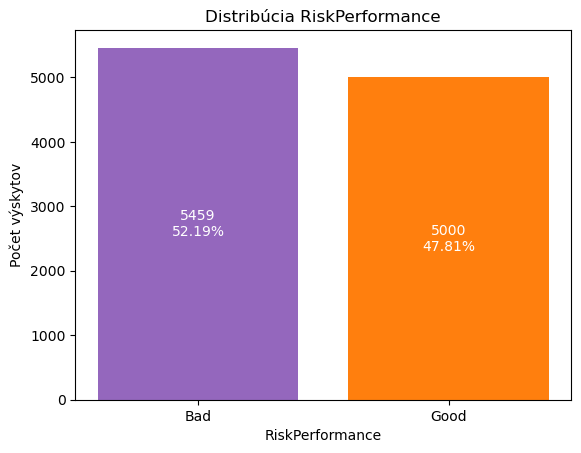

In [30]:
plot_risk_performance(df)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Záver</h3>

Takmer 53% klientov v datasete má hodnoty Bad, čo naznačuje, že dataset je takmer úplne vyvážený.

</div>


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 4.2 | Numerické premenné</h3>

Vzhľadom na to, že v datasete je dosť veľa numerických premenných, zobrazíme distribúciu tých najzaujímavejších z nich.

</div>

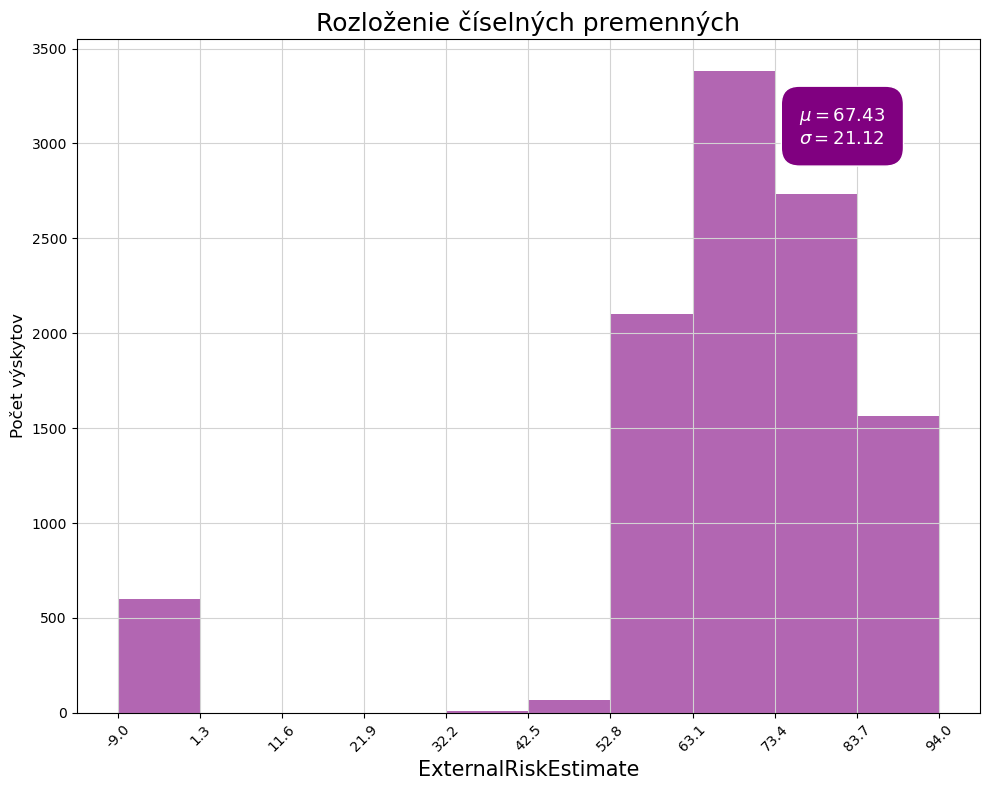

In [31]:
plot_numerical_distribution(df, ['ExternalRiskEstimate'])

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Záver:</h3>
    
- Priemerne ExternalRiskEstimate je približne 67, čo znamená, že väčšina klientov má nízky alebo stredný rizikový profil.

- Graf distribúcie je neštandardný a asymetrický.

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 5 | Špeciálne hodnoty </h3>
</div>


In [32]:
count_special_values(df)

                              Variable   -9    -8    -7
0                      RiskPerformance    0     0     0
1                 ExternalRiskEstimate  598     0     0
2                MSinceOldestTradeOpen  588   239     0
3            MSinceMostRecentTradeOpen  588     0     0
4                       AverageMInFile  588     0     0
5                NumSatisfactoryTrades  588     0     0
6          NumTrades60Ever2DerogPubRec  588     0     0
7          NumTrades90Ever2DerogPubRec  588     0     0
8               PercentTradesNeverDelq  588     0     0
9                 MSinceMostRecentDelq  588   176  4664
10            MaxDelq2PublicRecLast12M  588     0     0
11                         MaxDelqEver  588     0     0
12                      NumTotalTrades  588     0     0
13              NumTradesOpeninLast12M  588     0     0
14                PercentInstallTrades  588     0     0
15        MSinceMostRecentInqexcl7days  588   476  1855
16                        NumInqLast6M  588     

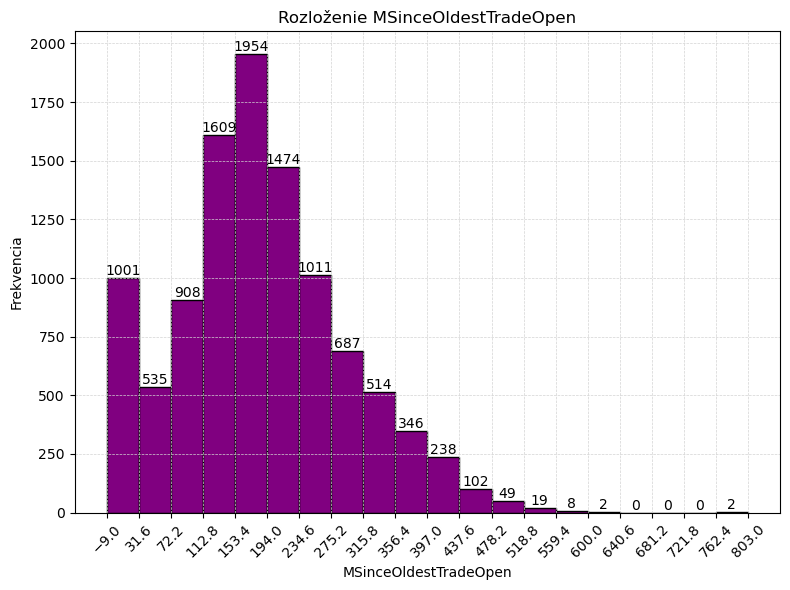

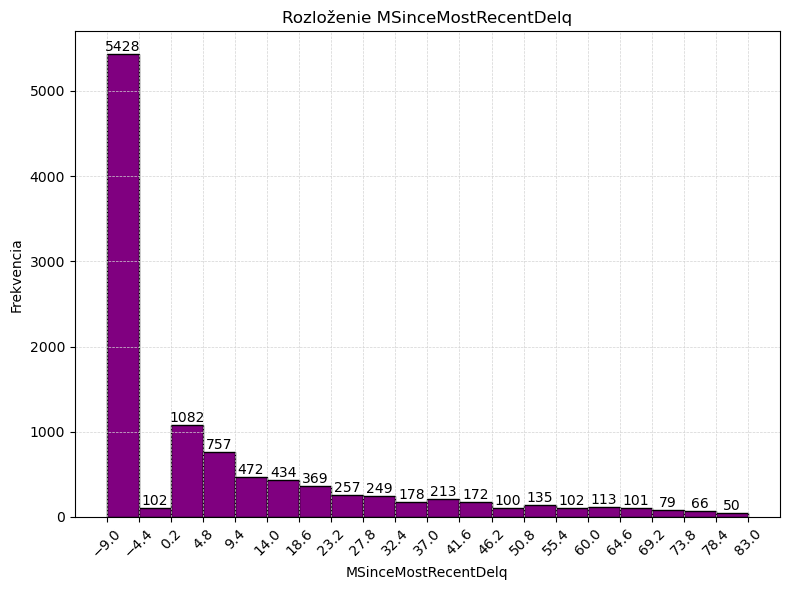

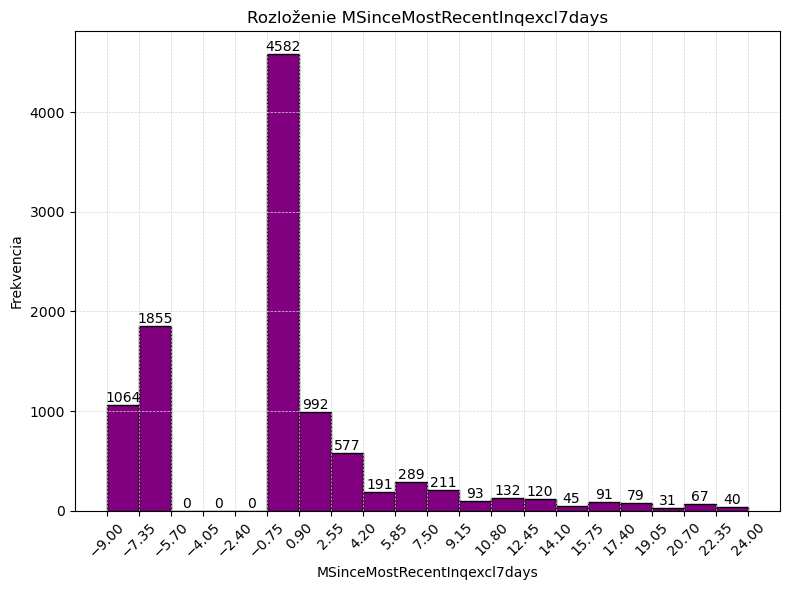

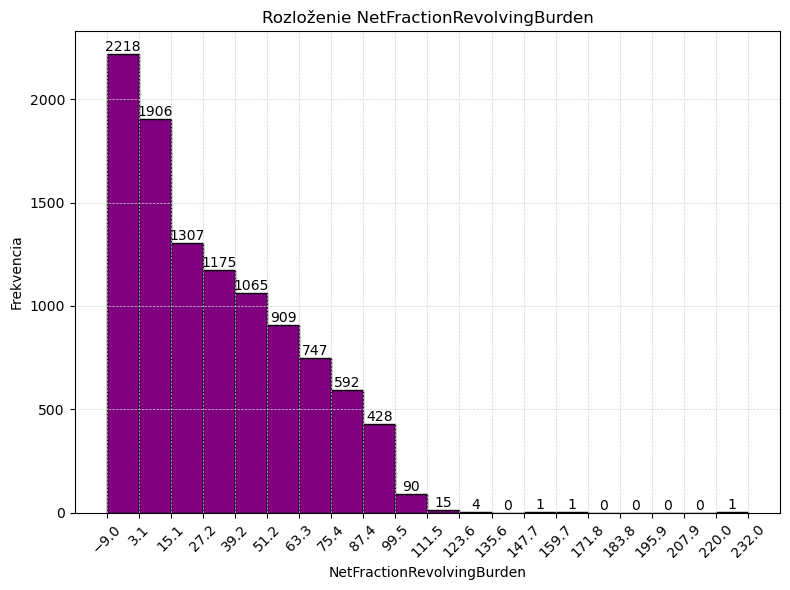

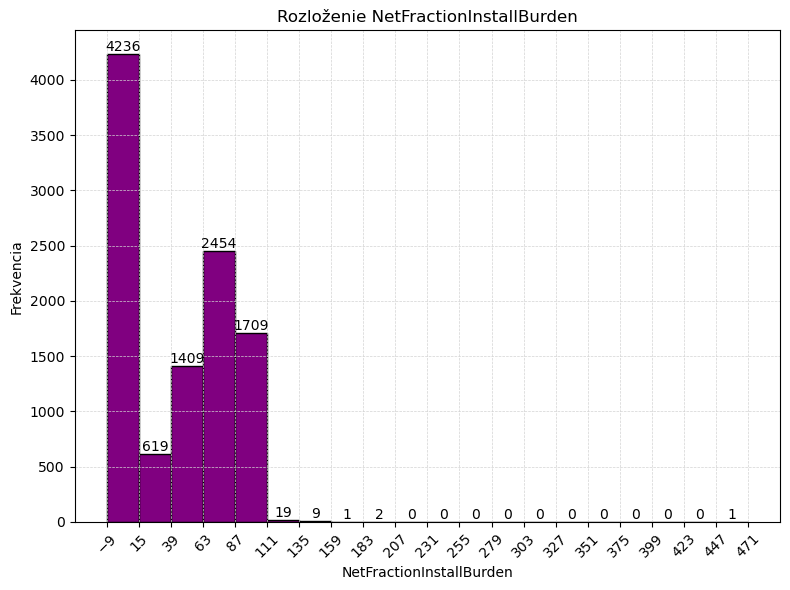

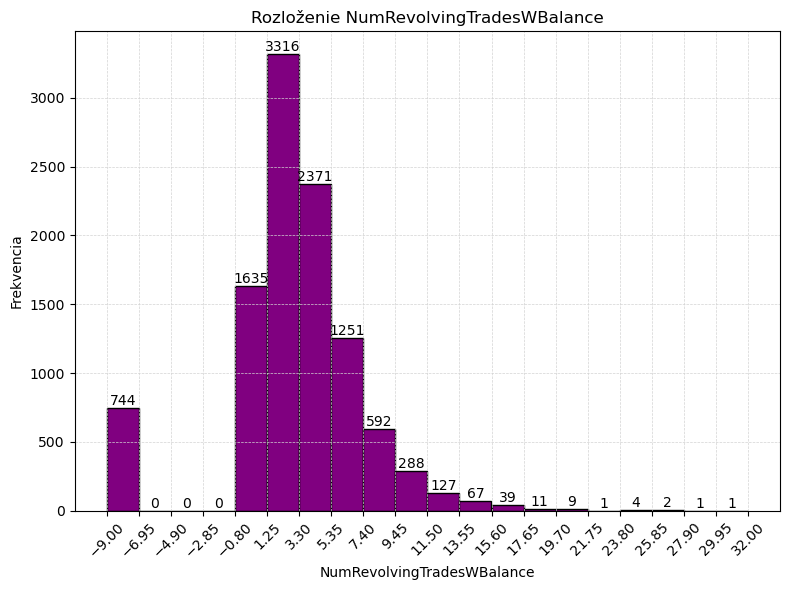

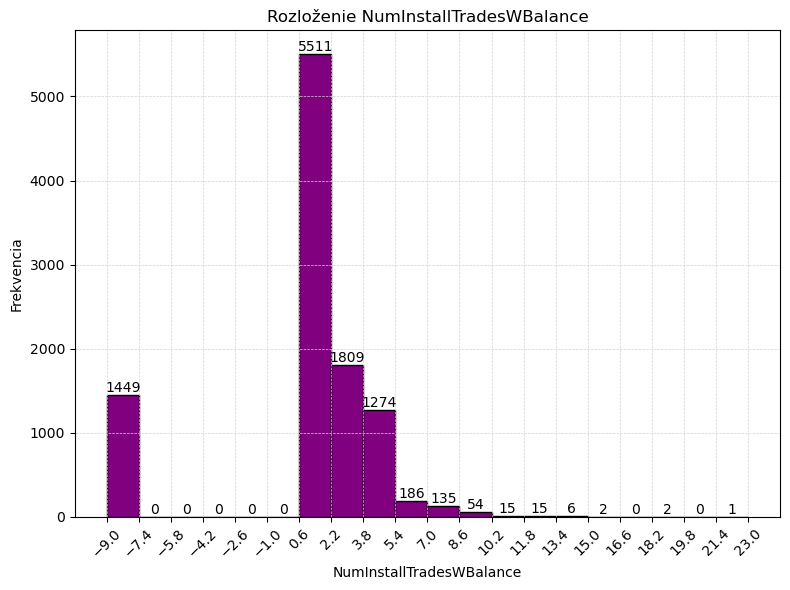

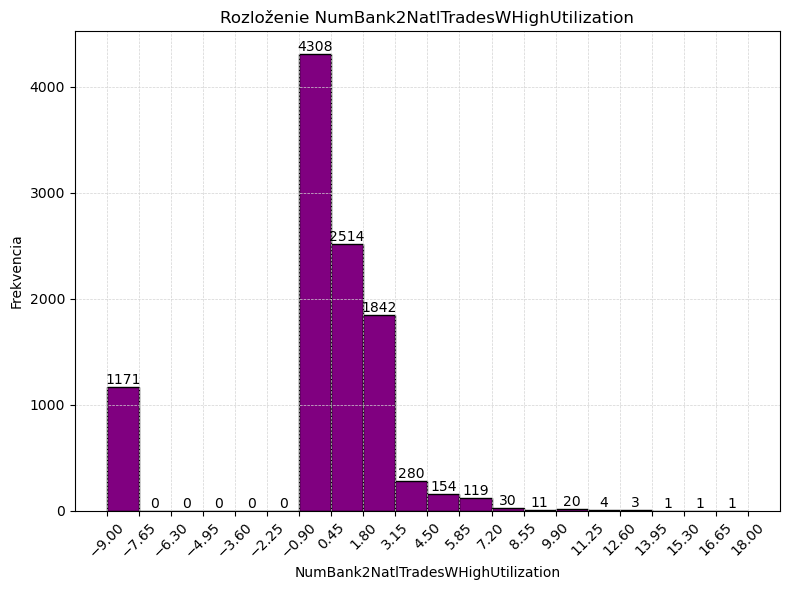

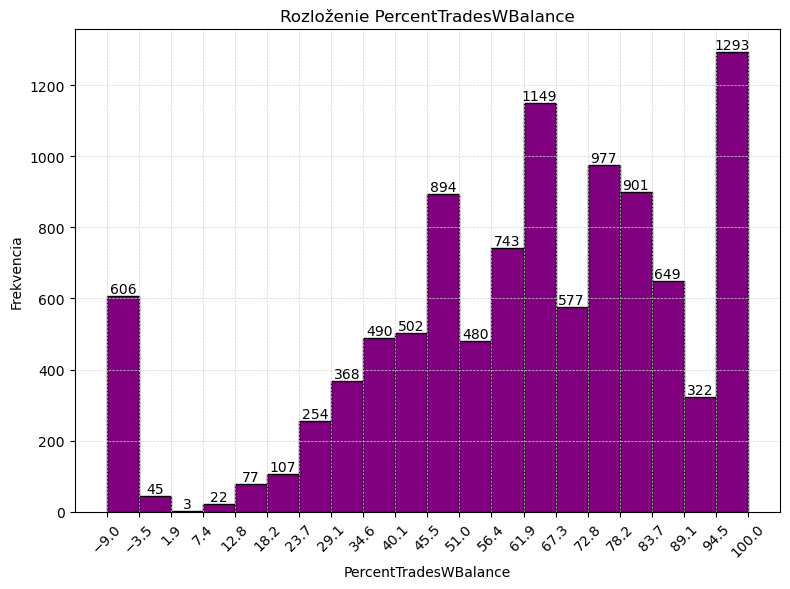

In [33]:
distribution_special_values(df)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Záver:</h3>
    
Rozloženie premenných s chýbajúcimi hodnotami je neštandardné a asymetrické, čo sa prejaví pri nahradení premenných v budúcnosti. Priemerná hodnota je citlivá na extrémy a môže byť skreslená. V tomto prípade je lepšie použiť medián, pretože je odolnejší voči extrémom a lepšie zobrazuje typickú hodnotu v dátach.

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 5.1 | Odstránenie -9</h3>
</div>

In [34]:
df = remove_minus_nine(df)

In [35]:
count_special_values(df)

                              Variable -9    -8    -7
0                      RiskPerformance  0     0     0
1                 ExternalRiskEstimate  0     0     0
2                MSinceOldestTradeOpen  0   239     0
3            MSinceMostRecentTradeOpen  0     0     0
4                       AverageMInFile  0     0     0
5                NumSatisfactoryTrades  0     0     0
6          NumTrades60Ever2DerogPubRec  0     0     0
7          NumTrades90Ever2DerogPubRec  0     0     0
8               PercentTradesNeverDelq  0     0     0
9                 MSinceMostRecentDelq  0   176  4658
10            MaxDelq2PublicRecLast12M  0     0     0
11                         MaxDelqEver  0     0     0
12                      NumTotalTrades  0     0     0
13              NumTradesOpeninLast12M  0     0     0
14                PercentInstallTrades  0     0     0
15        MSinceMostRecentInqexcl7days  0   476  1853
16                        NumInqLast6M  0     0     0
17               NumInqLast6

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 5.2 | Rozdelenie na X a y vzorku</h3>
</div>

In [36]:
X = df.drop(columns=['RiskPerformance'])
y = df['RiskPerformance']

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 5.3 | Percento chýbajúcich hodnôt pre každú premennú</h3>
</div>

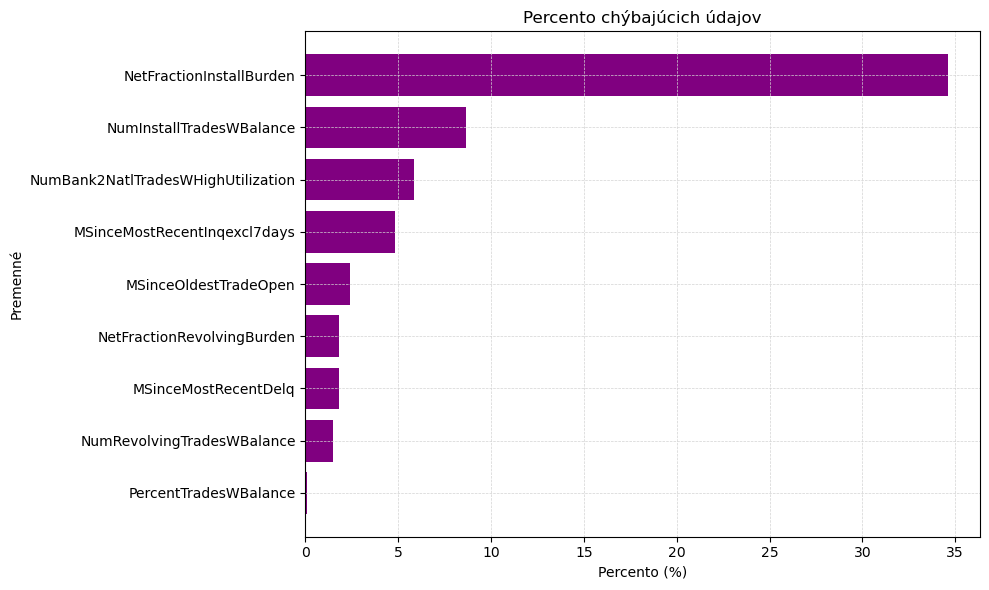

In [37]:
plot_missing_data_percentage(df)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Záver:</h3>
    
Takmer 35% hodnôt pre premennú NetFractionInstallBurden chýba, čo predstavuje dostatočne veľkú časť údajov, a preto bude premenná odstránená. Premenné s percentuálnym podielom chýbajúcich údajov nižším ako 10% budú nahradené po dôkladnejšej analýze.

</div>

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 5.3 | Odstránenie NetFractionInstallBurden</h3>
</div>

In [38]:
X.drop(columns=['NetFractionInstallBurden'], inplace=True)

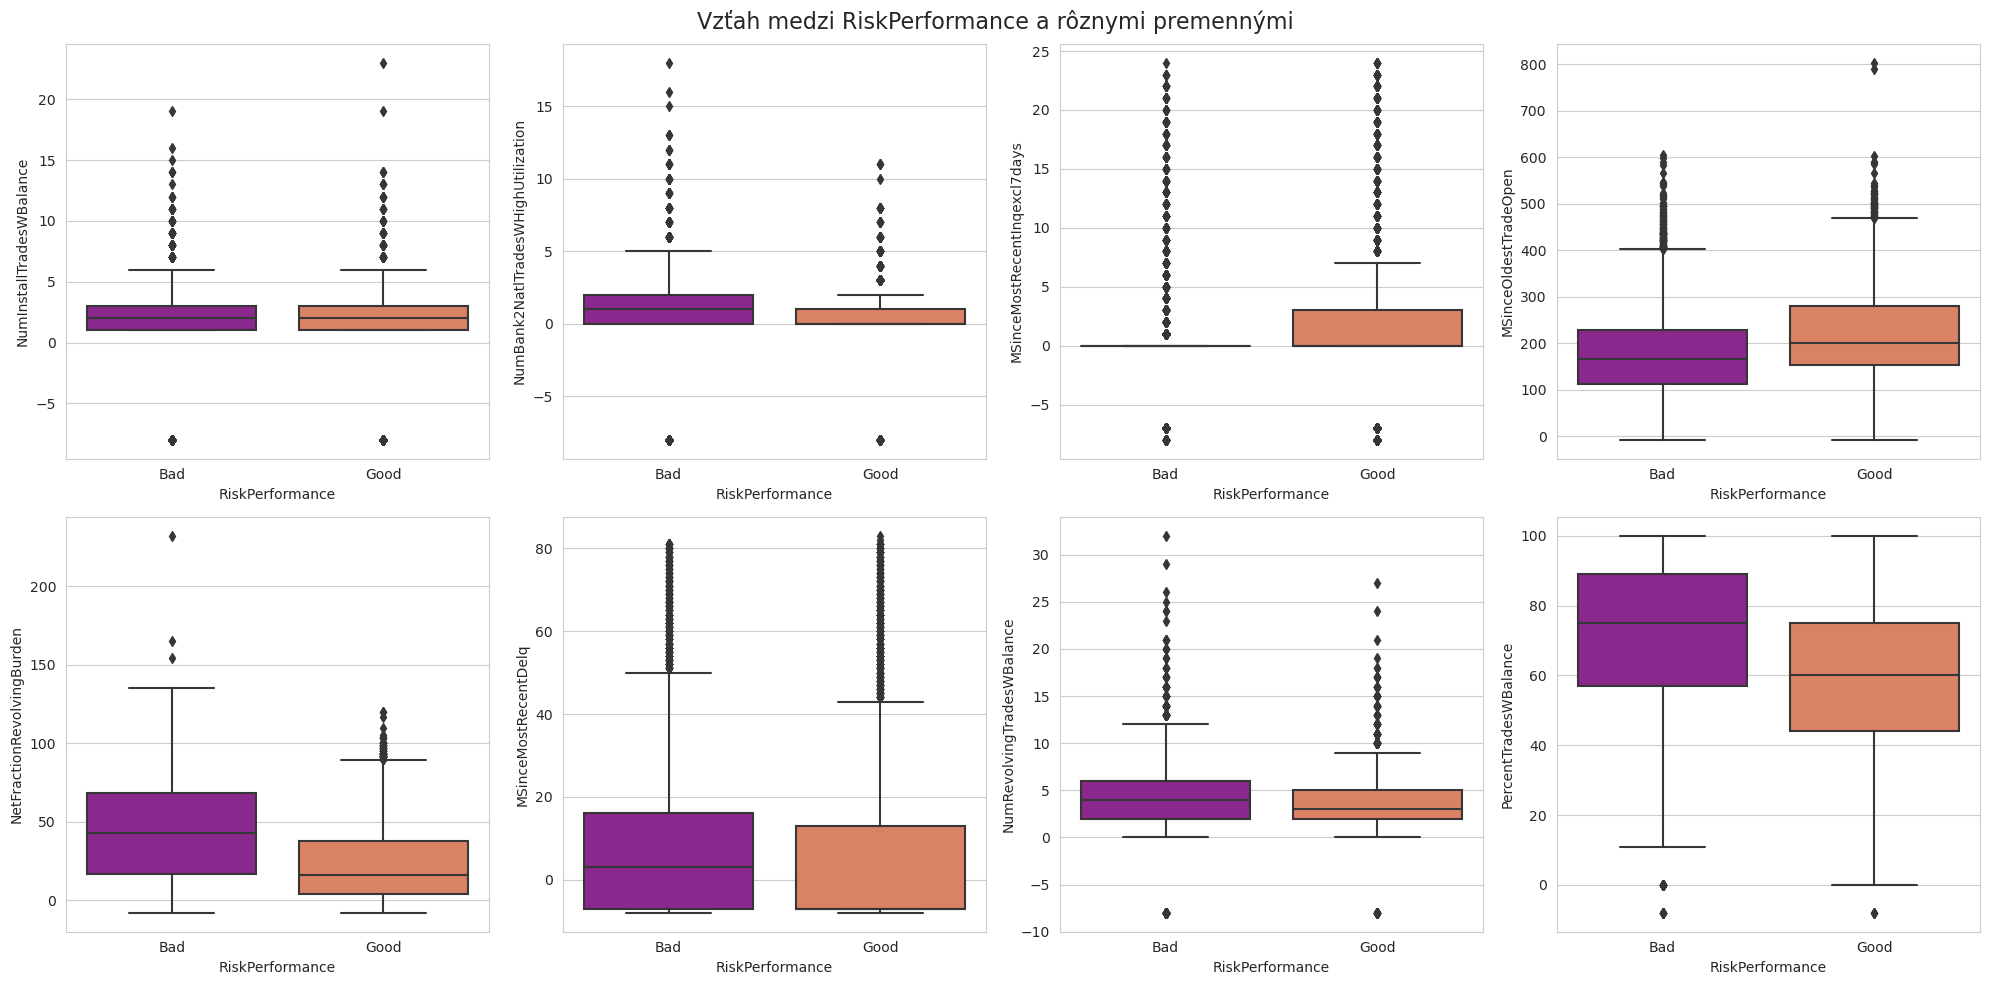

In [39]:
plot_boxplots(df)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Záver:</h3>
    
- **NumInstallTradesWBalance:** rovnomerne rozdelenie hodnôt Good a Bad (zjednodušene "rozdelenie")
    -> nahradenie mediánom

- **NumBank2NatlTradesWHighUtilization:** nerovnomerne rozdelenie 
    ->  nahradenie podľa priemerov v kategóriách Good a Bad (zjednodušene "nahradenie GB")
    
- **MSinceMostRecentInqexcl7days:**  nerovnomerne rozdelenie -> nahradenie GB
    
- **NetFractionRevolvingBurden:** zaujímavá premenná, nerovnomerne rozdelenie -> nahradenie GB

- **náhrada mediánom kvôli veľmi nízkemu percentu chýbajúcich údajov:** MSinceOldestTradeOpen, MSinceMostRecentDelq, NumRevolvingTradesWBalance, PercentTradesWBalance

</div>

In [40]:
X = replace_special_value_with_median(X, 'NumInstallTradesWBalance', -8)
X = replace_special_value_with_median(X, 'MSinceOldestTradeOpen', -8)
X = replace_special_value_with_median(X, 'MSinceMostRecentDelq', -8)
X = replace_special_value_with_median(X, 'NumRevolvingTradesWBalance', -8)
X = replace_special_value_with_median(X, 'PercentTradesWBalance', -8)

X = replace_special_value_with_median(X, 'NumBank2NatlTradesWHighUtilization', -8)
X = replace_special_value_with_median(X, 'MSinceMostRecentInqexcl7days', -8)
X = replace_special_value_with_median(X, 'NetFractionRevolvingBurden', -8)

In [41]:
count_special_values(df)

                              Variable -9    -8    -7
0                      RiskPerformance  0     0     0
1                 ExternalRiskEstimate  0     0     0
2                MSinceOldestTradeOpen  0   239     0
3            MSinceMostRecentTradeOpen  0     0     0
4                       AverageMInFile  0     0     0
5                NumSatisfactoryTrades  0     0     0
6          NumTrades60Ever2DerogPubRec  0     0     0
7          NumTrades90Ever2DerogPubRec  0     0     0
8               PercentTradesNeverDelq  0     0     0
9                 MSinceMostRecentDelq  0   176  4658
10            MaxDelq2PublicRecLast12M  0     0     0
11                         MaxDelqEver  0     0     0
12                      NumTotalTrades  0     0     0
13              NumTradesOpeninLast12M  0     0     0
14                PercentInstallTrades  0     0     0
15        MSinceMostRecentInqexcl7days  0   476  1853
16                        NumInqLast6M  0     0     0
17               NumInqLast6

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 6 | Nahradenie hodnôt Good a Bad hodnotami 1 a 0</h3>
</div>

In [42]:
y = y.replace({'Bad': 0, 'Good': 1})

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 7 | Rozdelenie na trénovaciu a testovaciu vzorku</h3>
</div>

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 8 | XGBoost</h3>
</div>

In [44]:
#**8.1: Hyperparameter Tuning**
"""
from sklearn.model_selection import GridSearchCV

CV = True

if CV:
    learning_rate =  [0.001, 0.01, 0.1]
    max_depth = np.arange(3,6)
    alpha = [0,2,10]
    colsample_bytree = [0,0.2,0.5]
    parameters = {'learning_rate': learning_rate, 'max_depth': max_depth,
                 'alpha': alpha, 'colsample_bytree':colsample_bytree}
    xgb_mod = xgb.XGBClassifier(objective='reg:logistic')
    xgb_mod = GridSearchCV(xgb_mod, parameters, scoring='f1', cv=5)
    xgb_mod.fit(X_train,y_train)
    print("The best parameters for XGB Classifier are %s with a score of %0.2f" % (xgb_mod.best_params_, xgb_mod.best_score_))
    
else: 
    xgb_mod = xgb.XGBClassifier(objective='reg:logistic', colsample_bytree=0.2, alpha=10,
                            learning_rate=0.1, max_depth=4, n_estimators=100)
    xgb_mod.fit(X_train,y_train)
    """

'\nfrom sklearn.model_selection import GridSearchCV\n\nCV = True\n\nif CV:\n    learning_rate =  [0.001, 0.01, 0.1]\n    max_depth = np.arange(3,6)\n    alpha = [0,2,10]\n    colsample_bytree = [0,0.2,0.5]\n    parameters = {\'learning_rate\': learning_rate, \'max_depth\': max_depth,\n                 \'alpha\': alpha, \'colsample_bytree\':colsample_bytree}\n    xgb_mod = xgb.XGBClassifier(objective=\'reg:logistic\')\n    xgb_mod = GridSearchCV(xgb_mod, parameters, scoring=\'f1\', cv=5)\n    xgb_mod.fit(X_train,y_train)\n    print("The best parameters for XGB Classifier are %s with a score of %0.2f" % (xgb_mod.best_params_, xgb_mod.best_score_))\n    \nelse: \n    xgb_mod = xgb.XGBClassifier(objective=\'reg:logistic\', colsample_bytree=0.2, alpha=10,\n                            learning_rate=0.1, max_depth=4, n_estimators=100)\n    xgb_mod.fit(X_train,y_train)\n    '

In [45]:
my_model = xgb.XGBClassifier(n_estimators=500, 
                             learning_rate=0.05, 
                             early_stopping_rounds=5)
my_model.fit(X_train, y_train, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      4112
           1       0.80      0.77      0.78      3776

    accuracy                           0.80      7888
   macro avg       0.80      0.80      0.80      7888
weighted avg       0.80      0.80      0.80      7888


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1016
           1       0.73      0.69      0.71       957

    accuracy                           0.73      1973
   macro avg       0.73      0.73      0.73      1973
weighted avg       0.73      0.73      0.73      1973





/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


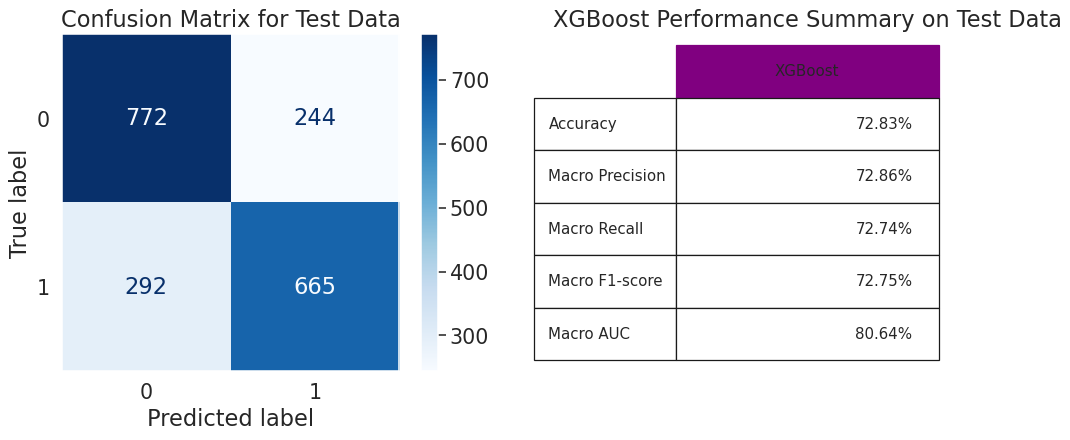

In [46]:
model_evaluation(my_model, X_train, X_valid, y_train, y_valid, 'XGBoost')

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Klienti</h3> 
    
Mladý architekt **John** sa rozhodol požiadať o úver na rekonštrukciu svojho novozakúpeného bytu. Na opravu bytu a potrebné úpravy chce použiť úverovú linku na financovanie bývania (HELOC). Aby získal odhad svojej úverovej bonity a možných podmienok úveru HELOC, John sa obrátil na finančného poradcu, ktorý mu odporučil použiť systém založený na umelej inteligencii, ktorý na základe historických údajov odhadne pravdepodobnosť schválenia úveru. Na získanie odhadu svojej žiadosti o úver HELOC musel John poskytnúť rôzne finančné informácie:

(Poznámka: vynechané hodnoty v stĺpci "Váha" znamenajú, že premenná môže mať hodnoty od 0, horná hranica nie je stanovená.)
    
| Feature                                 | John  |    Rozsah  |
|-----------------------------------------|-------|------------|
| ExternalRiskEstimate                    | 84    | 0-100      |
| MSinceOldestTradeOpen                   | 273   |            |
| MSinceMostRecentTradeOpen               | 6     |            |
| AverageMInFile                          | 119   |            |
| NumSatisfactoryTrades                   | 19    |            |
| NumTrades60Ever2DerogPubRec             | 0     |            |
| NumTrades90Ever2DerogPubRec             | 0     |            |
| PercentTradesNeverDelq                  | 95    | 0-100      |
| MSinceMostRecentDelq                    | 25    |            |
| MaxDelq2PublicRecLast12M                | 6     | 0-7        |
| MaxDelqEver                             | 6     | 2-8        |
| NumTotalTrades                          | 19    |            |
| NumTradesOpeninLast12M                  | 1     |            |
| PercentInstallTrades                    | 16    | 0-100      |
| MSinceMostRecentInqexcl7days            | 0     |            |
| NumInqLast6M                            | 2     |            |
| NumInqLast6Mexcl7days                   | 2     |            |
| NetFractionRevolvingBurden              | 3     |            |
| NumRevolvingTradesWBalance              | 2     |            |
| NumInstallTradesWBalance                | 1     |            |
| NumBank2NatlTradesWHighUtilization      | 0     |            |
| PercentTradesWBalance                   | 30    | 0-100      |

</div>

In [47]:
john = X_valid.iloc[10]
var = y_valid.iloc[10]
john
#var

ExternalRiskEstimate                   84
MSinceOldestTradeOpen                 273
MSinceMostRecentTradeOpen               6
AverageMInFile                        119
NumSatisfactoryTrades                  19
NumTrades60Ever2DerogPubRec             0
NumTrades90Ever2DerogPubRec             0
PercentTradesNeverDelq                 95
MSinceMostRecentDelq                   25
MaxDelq2PublicRecLast12M                6
MaxDelqEver                             6
NumTotalTrades                         19
NumTradesOpeninLast12M                  1
PercentInstallTrades                   16
MSinceMostRecentInqexcl7days            0
NumInqLast6M                            2
NumInqLast6Mexcl7days                   2
NetFractionRevolvingBurden              3
NumRevolvingTradesWBalance              2
NumInstallTradesWBalance                1
NumBank2NatlTradesWHighUtilization      0
PercentTradesWBalance                  30
Name: 1532, dtype: int64

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 9 | SHAP</h3>
</div>

In [48]:
!pip install git+https://github.com/shap/shap.git@master
import shap

  Cloning https://github.com/shap/shap.git (to revision master) to /tmp/pip-req-build-lo97q6d6
  Running command git clone --filter=blob:none --quiet https://github.com/shap/shap.git /tmp/pip-req-build-lo97q6d6
  Resolved https://github.com/shap/shap.git to commit 77e92c3c110e816b768a0ec2acfbf4cc08ee13db
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.45.2.dev2-cp310-cp310-linux_x86_64.whl size=453481 sha256=7049c1163e98de8040e7e7fac9cd38a6b4c8924110beaf171c0f575c91009baa
  Stored in directory: /tmp/pip-ephem-wheel-cache-m_k27agy/wheels/42/bc/ff/a9116b629142165f309dba640cfcfb3bbb6105ae97b3ae667f
Successfully built shap


In [49]:
explainer = shap.Explainer(my_model)
shap_values = explainer(X_valid)
shap_values

.values =
array([[ 6.68161690e-01,  3.88182066e-02,  1.65108591e-02, ...,
        -9.46347788e-03,  1.16646439e-01, -3.84704769e-02],
       [-9.96123672e-01, -1.46248862e-01,  8.77268333e-03, ...,
         3.16456752e-03,  1.60685088e-02,  1.15356492e-02],
       [ 1.13235891e+00,  5.31634055e-02, -2.58994680e-02, ...,
         1.06144790e-02,  7.80025721e-02,  2.57662591e-02],
       ...,
       [-1.04394162e+00,  1.08189248e-01,  1.15584349e-02, ...,
        -7.48985028e-03, -1.15082294e-01,  1.49358399e-02],
       [-4.78820592e-01,  3.02640826e-01,  3.69471274e-02, ...,
        -3.26407910e-03, -6.69198111e-02, -4.74849157e-03],
       [-7.63604760e-01, -1.33751467e-01,  2.32560318e-02, ...,
        -7.82934148e-05, -2.26503797e-02, -9.07582045e-03]], dtype=float32)

.base_values =
array([-0.08383747, -0.08383747, -0.08383747, ..., -0.08383747,
       -0.08383747, -0.08383747], dtype=float32)

.data =
array([[ 81, 184,   7, ...,   1,   0,  75],
       [ 56, 120,   5, ...,   4,   2

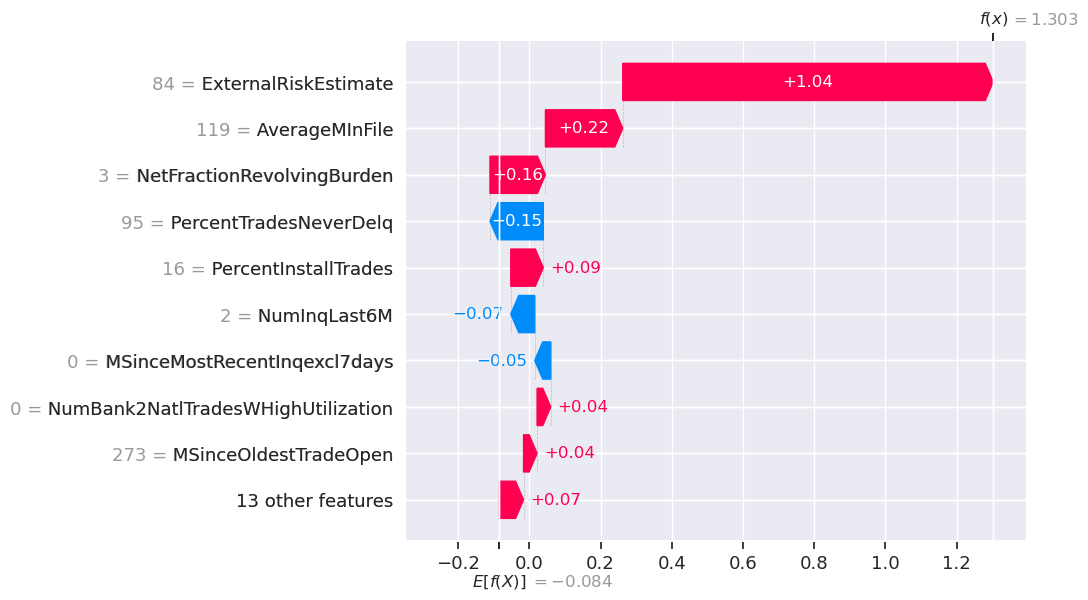

In [50]:
john_id = 10
shap.plots.waterfall(shap_values[john_id], show=True)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 10 | LIME</h3>
</div>

In [51]:
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=ff9995ca9d9ce682959dbed04a19daf83bbf19e545f7478be22777a7221656d9
  Stored in directory: /home/jovyan/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [52]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Bad', 'Good'])

In [53]:
#sample_idx = 1665
sample = X_valid.iloc[john_id]
explanation = explainer.explain_instance(sample.values, my_model.predict_proba, num_features=8)
explanation.show_in_notebook()

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 11 | Anchor</h3>
</div>

In [54]:
!pip install anchor-exp
from anchor import utils
from anchor import anchor_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 10.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 73.3 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 kB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 

In [55]:
explainer = anchor_tabular.AnchorTabularExplainer(
    class_names=['Bad', 'Good'],  
    feature_names=X_train.columns,
    train_data=X_train.values,
)


In [56]:
#idx = 1665
np.random.seed(1)
exp = explainer.explain_instance(X_valid.values[john_id], my_model.predict, threshold=0.95)

In [57]:
#print('John Result: % - (Good)' % y_valid[john_id])
#y_valid[john_id]

print(f'John Result: {y_valid[john_id]} (Good)')

John Result: 1 (Good)


In [58]:
print(f'John Result: {y_valid[john_id]} (Good)\n')
print('Anchors:')
print('%s' % (' AND\n'.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

John Result: 1 (Good)

Anchors:
ExternalRiskEstimate > 80.00 AND
MSinceOldestTradeOpen > 256.00 AND
NetFractionRevolvingBurden <= 9.00
Precision: 0.98
Coverage: 0.06


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 12 | PDP</h3>
</div>

In [59]:
from sklearn.inspection import PartialDependenceDisplay

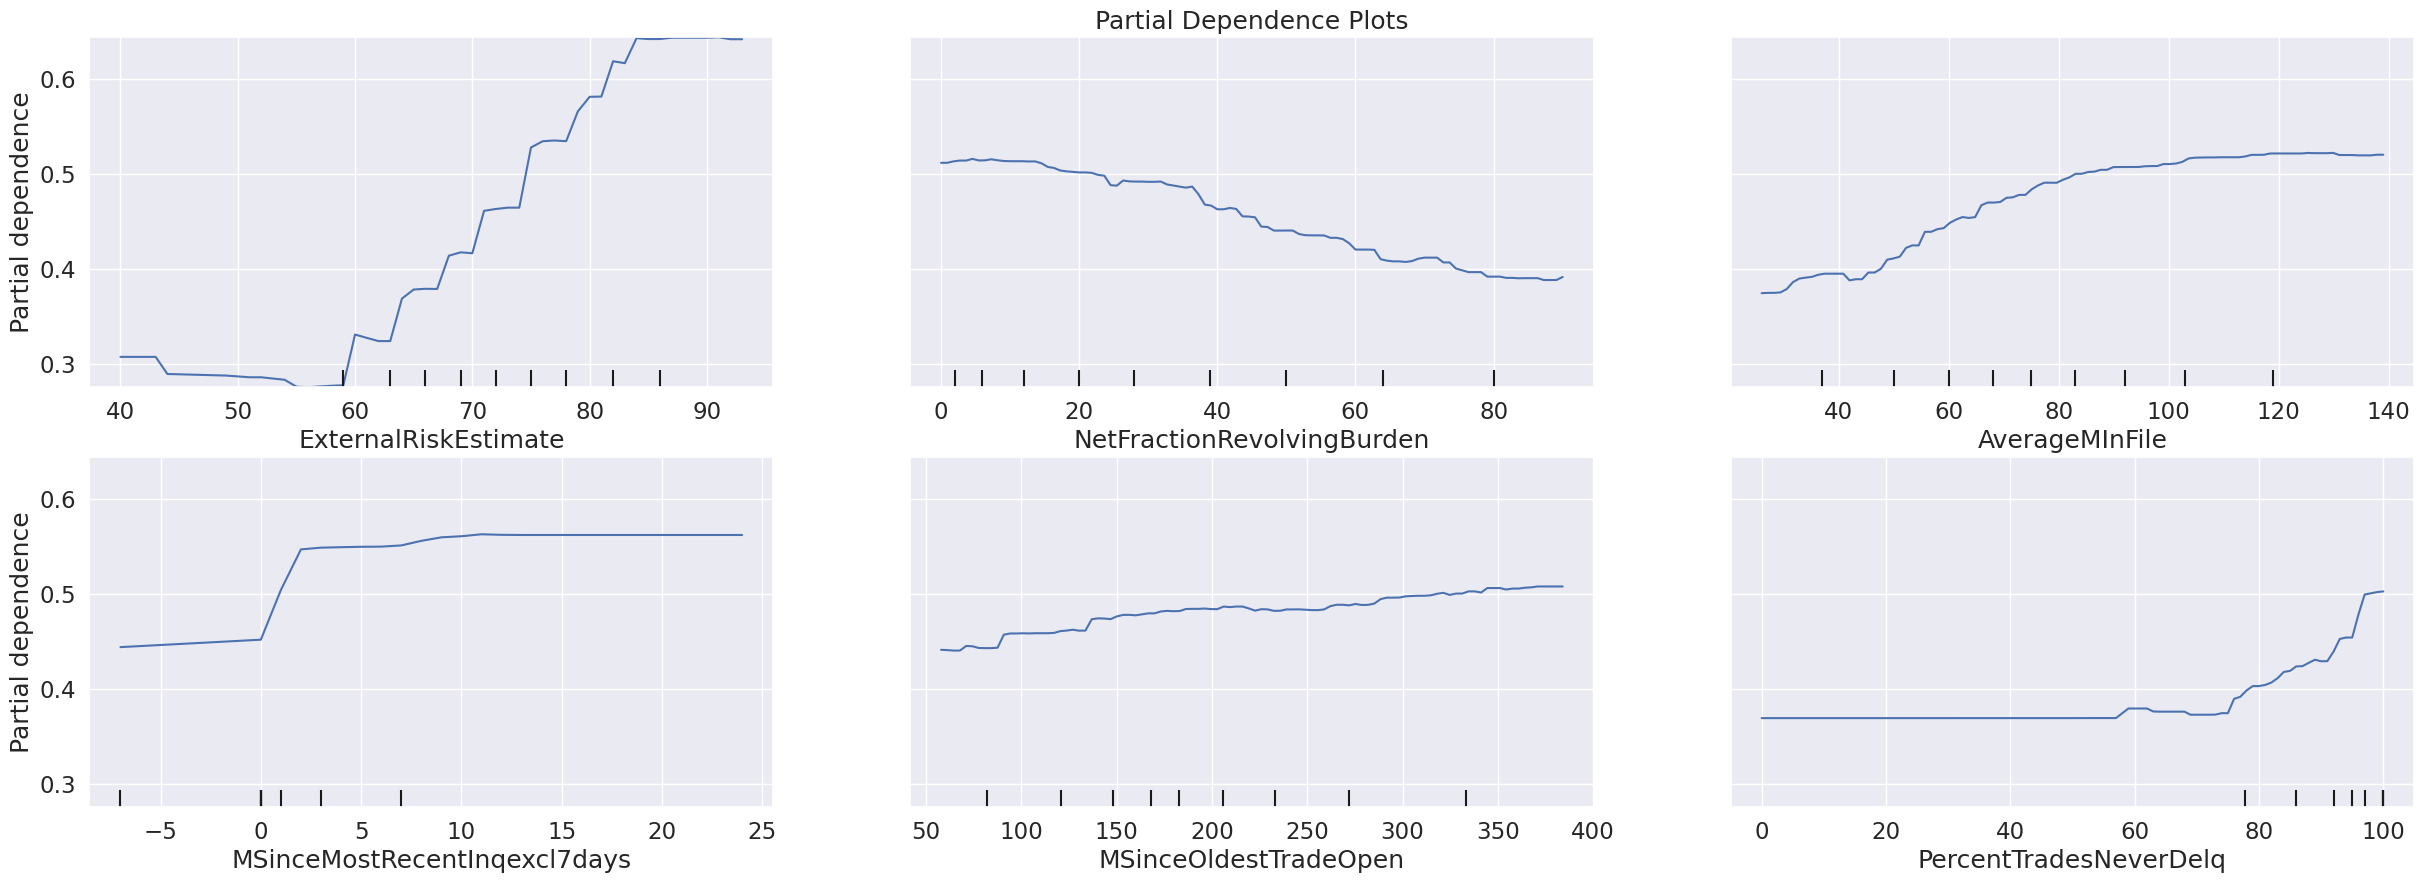

In [60]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=my_model,
    X=X_valid,
    features=('ExternalRiskEstimate', 'NetFractionRevolvingBurden', 'AverageMInFile', 'MSinceMostRecentInqexcl7days','MSinceOldestTradeOpen', 'PercentTradesNeverDelq'), 
    random_state=5,
    ax=ax,
    kind='average',
    grid_resolution = 100,   
)

plt.show()

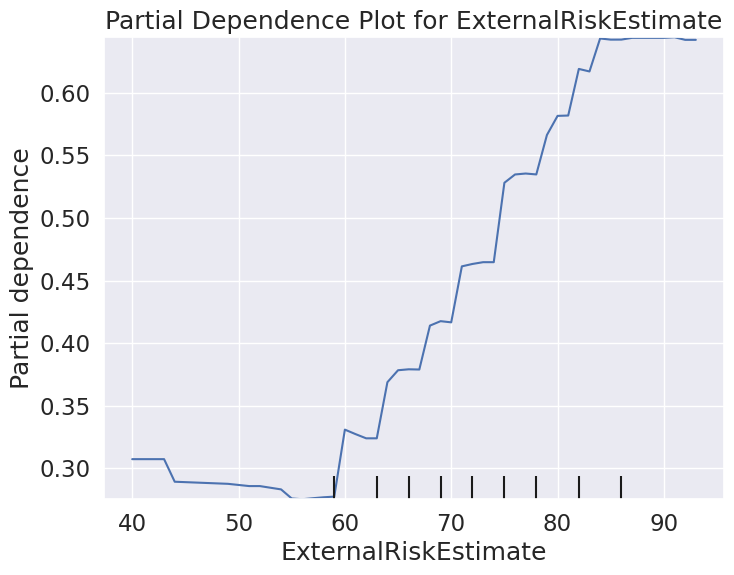

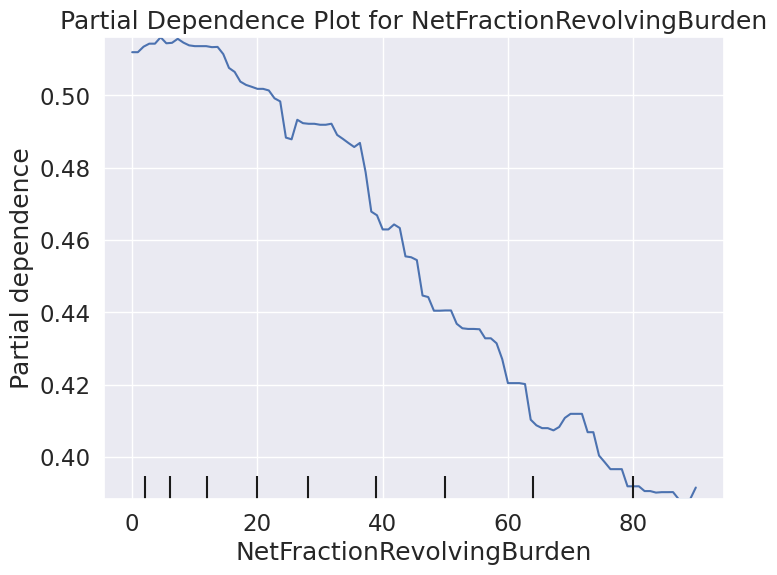

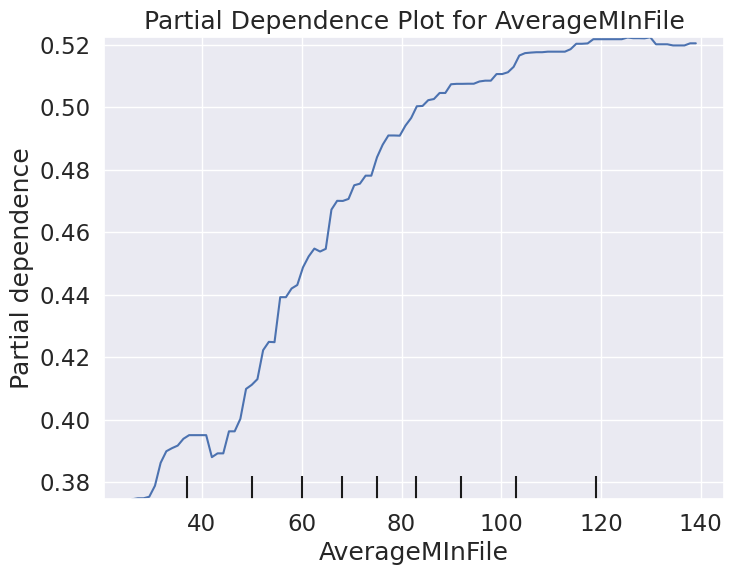

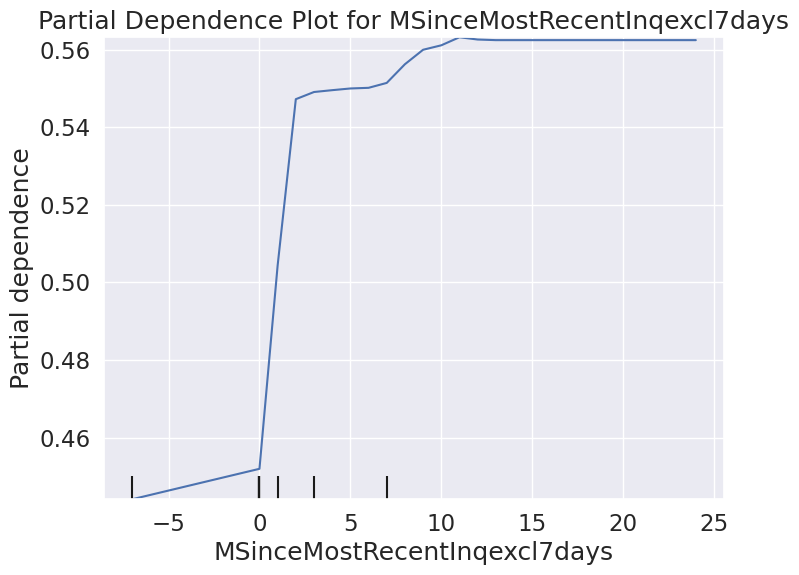

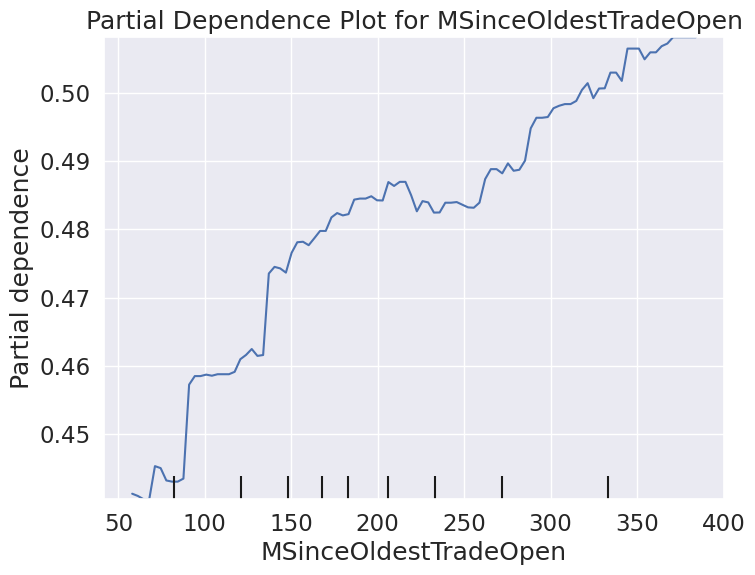

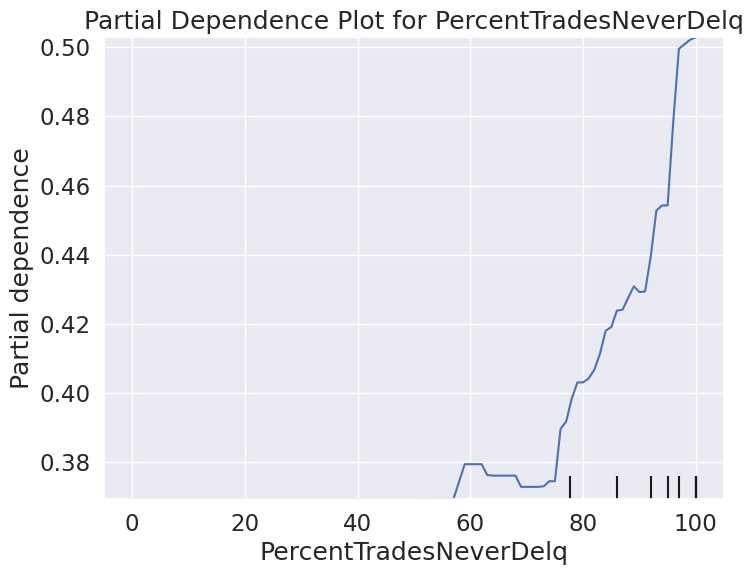

In [61]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = ('ExternalRiskEstimate', 'NetFractionRevolvingBurden', 'AverageMInFile', 'MSinceMostRecentInqexcl7days','MSinceOldestTradeOpen', 'PercentTradesNeverDelq')

for feature in features_to_plot:
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(f"Partial Dependence Plot for {feature}")
    PartialDependenceDisplay.from_estimator(
        estimator=my_model,
        X=X_valid,
        features=[feature], 
        random_state=5,
        ax=ax,
        kind='average',
        grid_resolution=100,
    )
    plt.show()


<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 13 | ALE</h3>
</div>

In [62]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
from alepython import ale_plot
import matplotlib as mpl

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-l_ei9p2l/alepython_ad4fda010d704a3f9915a3f0c26a6665
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-l_ei9p2l/alepython_ad4fda010d704a3f9915a3f0c26a6665
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15144 sha256=47a68d3090e1799dd47327b00a91979753a480b23450ce0cdc8bce2b6dfc8e52
  Stored in directory: /tmp/pip-ephem-wheel-cache-drq_498s/wheels/80/2e/91/7f216caef9a7f0c6ce18ee562b6156df43b3a79f69a0c1f3d1
Successfully built alepython


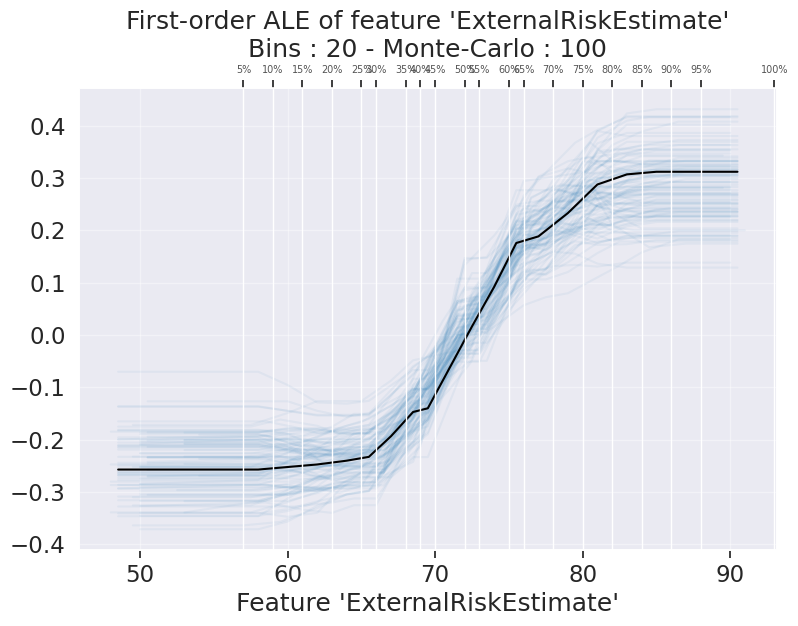

<AxesSubplot:title={'center':"First-order ALE of feature 'ExternalRiskEstimate'\nBins : 20 - Monte-Carlo : 100"}, xlabel="Feature 'ExternalRiskEstimate'">

In [87]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    X_valid.columns[:1],
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

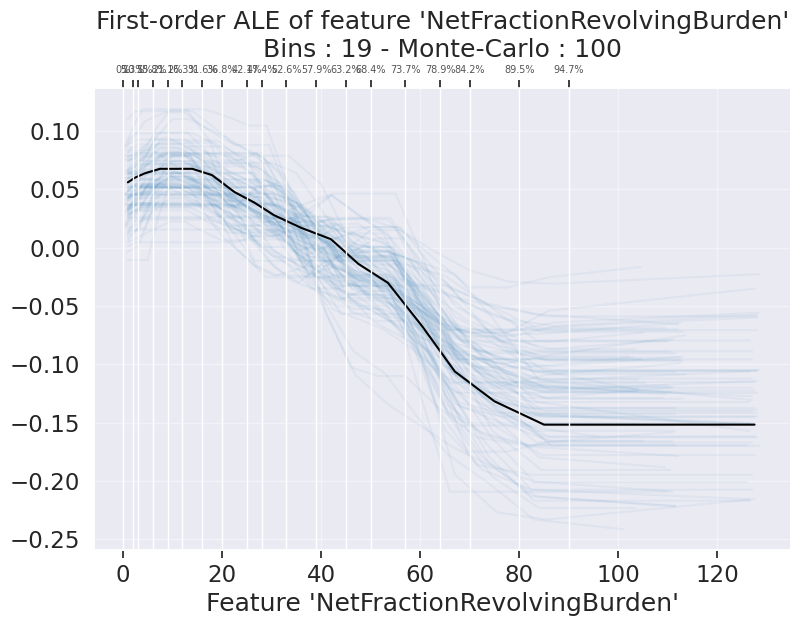

<AxesSubplot:title={'center':"First-order ALE of feature 'NetFractionRevolvingBurden'\nBins : 19 - Monte-Carlo : 100"}, xlabel="Feature 'NetFractionRevolvingBurden'">

In [88]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='NetFractionRevolvingBurden',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

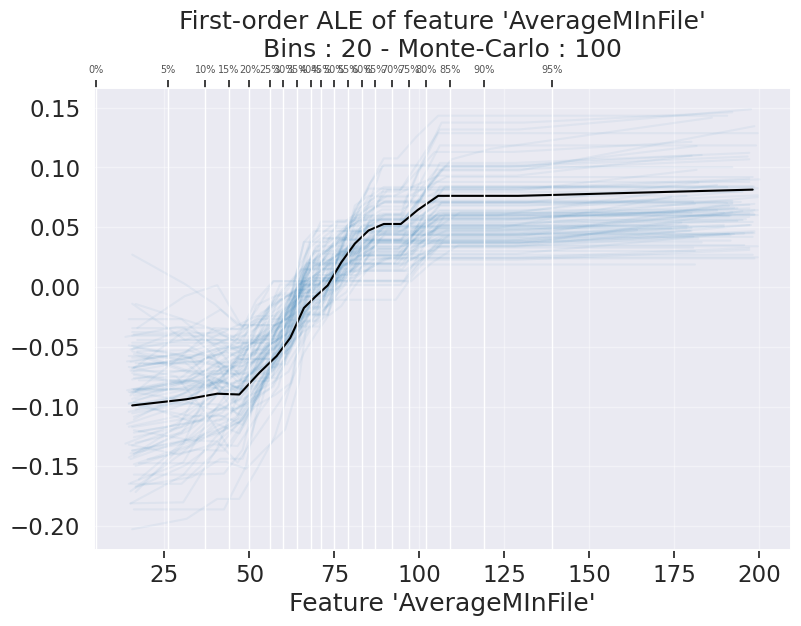

<AxesSubplot:title={'center':"First-order ALE of feature 'AverageMInFile'\nBins : 20 - Monte-Carlo : 100"}, xlabel="Feature 'AverageMInFile'">

In [89]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='AverageMInFile',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

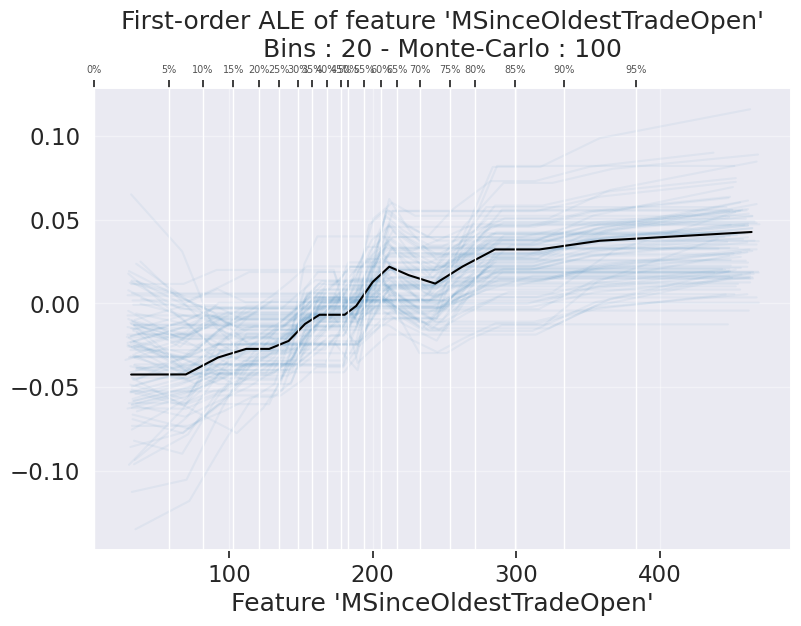

<AxesSubplot:title={'center':"First-order ALE of feature 'MSinceOldestTradeOpen'\nBins : 20 - Monte-Carlo : 100"}, xlabel="Feature 'MSinceOldestTradeOpen'">

In [90]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='MSinceOldestTradeOpen',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

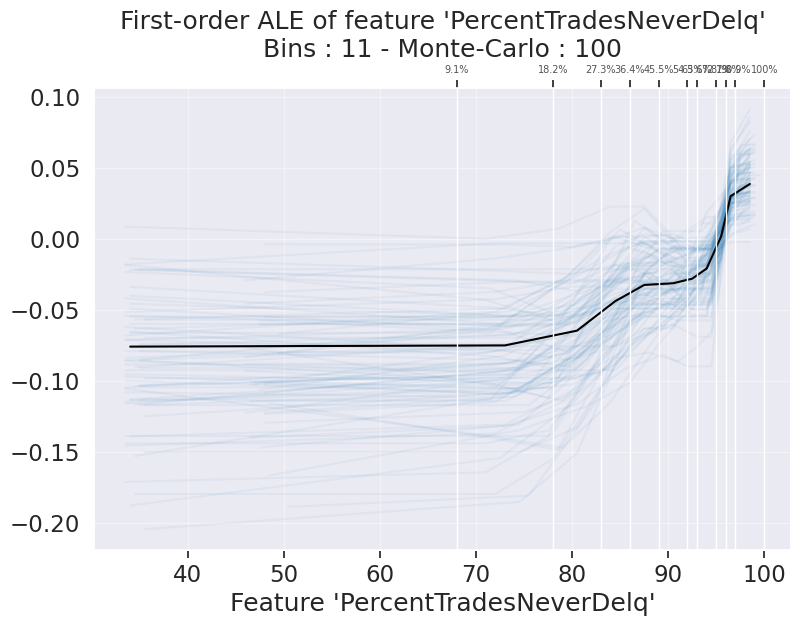

<AxesSubplot:title={'center':"First-order ALE of feature 'PercentTradesNeverDelq'\nBins : 11 - Monte-Carlo : 100"}, xlabel="Feature 'PercentTradesNeverDelq'">

In [91]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='PercentTradesNeverDelq',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

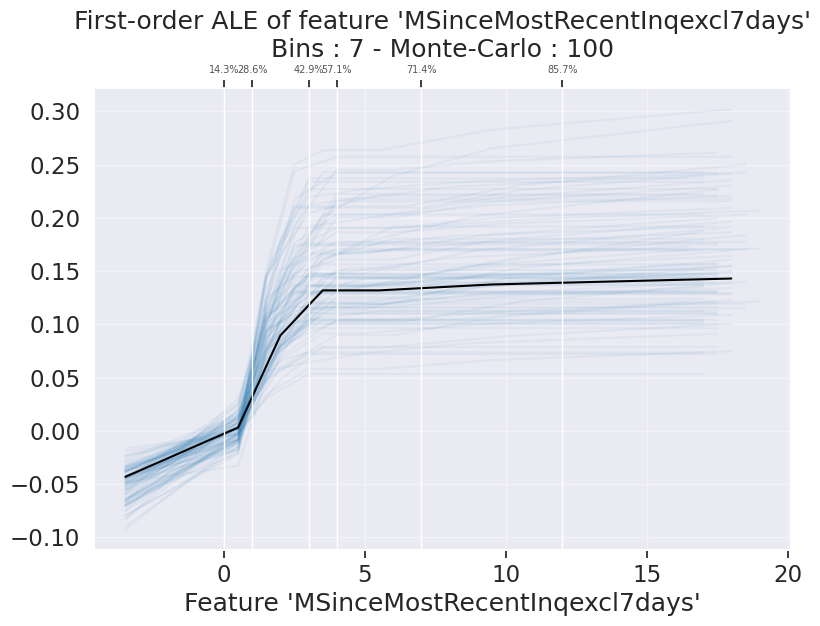

<AxesSubplot:title={'center':"First-order ALE of feature 'MSinceMostRecentInqexcl7days'\nBins : 7 - Monte-Carlo : 100"}, xlabel="Feature 'MSinceMostRecentInqexcl7days'">

In [92]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(
    my_model,
    X_valid,
    features='MSinceMostRecentInqexcl7days',
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

<div style="background-color: #E2BFFF; padding: 10px; border-radius: 10px;">
<h3>Krok 14 | Porovnanie metód</h3>
    https://pypi.org/project/xai-benchmark/
</div>

In [69]:
from IPython.display import clear_output

In [70]:
!pip install aix360
clear_output()

In [71]:
from aix360.metrics.local_metrics import faithfulness_metric

In [72]:
base_values = np.mean(X, axis=0)
base = np.array([base_values])
base_scalar = base.flatten()

In [73]:
base_scalar

array([ 72.06044012, 200.39519319,   9.52053544,  78.74424501,
        21.13041274,   0.58056992,   0.3837339 ,  92.35898996,
         7.85194199,   5.75813812,   6.37450563,  22.64516783,
         1.86441537,  34.59334753,   0.57864314,   1.45553189,
         1.39671433,  34.73765338,   4.08528547,   2.44305851,
         1.0867052 ,  66.45543048])

In [74]:
##########SHAP

In [75]:
x_array = john.values  
shap_array = shap_values[john_id].values 

In [76]:
base_scalar = base.flatten()
shap_faithfulness = faithfulness_metric(my_model, x_array, shap_array, base_scalar)
shap_faithfulness

0.9469307561821877

In [77]:
###########LIME

In [78]:
sample = X_valid.iloc[john_id]
explainer_1 = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Bad', 'Good'])

In [79]:
explanation_1 = explainer_1.explain_instance(sample.values, my_model.predict_proba, num_features=22)

In [80]:
lime_explanation = explanation_1.as_list()

In [81]:
lime_feature_importance = {name: importance for name, importance in lime_explanation}
lime_importance_array = np.array(list(lime_feature_importance.values()))

In [82]:
lime_faithfulness = faithfulness_metric(my_model, x_array, lime_importance_array, base_scalar)

In [83]:
lime_faithfulness

0.7984967047397152

In [84]:
from aix360.metrics.local_metrics import monotonicity_metric

In [85]:
shap_monotonicity = monotonicity_metric(my_model, x_array, shap_array, base_scalar)
shap_monotonicity

False

In [86]:
lime_monotonicity = monotonicity_metric(my_model, x_array, lime_importance_array, base_scalar)
lime_monotonicity


False